In [ ]:
# Sample screening of polymers with Morgan fingerprint, Tg, SA

#Importing pandas to read data,take the secondary substructure as an example

import pandas as pd


In [6]:
erji = pd.read_csv('E:/Lieconv/wandb_pytorch/PI1M/PI1M_all_seclet_erji_with_pairs.csv')
erji

,index,Smiles,SA,Tg_pred,Morgan fingerprint pairs
0,6880,*c1ccc(-c2ccc(-c3nc4ccc(-c5ccc6nc(*)sc6c5)cc4s...,3.148073,578.546692,"[366, 587, 1896]"
1,881,*c1ccc(-c2nc3ccc(-c4ccc5nc(*)[nH]c5c4)cc3o2)cc1,3.315860,496.296509,"[587, 1839, 1896]"
2,7442,*c1ccc(-c2ccc(-c3nc4cc5nc(*)[nH]c5cc4s3)cc2)cc1,3.375013,494.074524,"[587, 1839, 1896]"
3,4716,*c1ccc(-c2ccc(-c3nc4ccc(-c5ccc6nc(*)sc6c5)cc4o...,3.161383,478.144348,"[366, 587, 1896]"
4,5711,*c1ccc(-n2c(=O)c3cc4c(=O)n(*)c(=O)c4cc3c2=O)cc1O,3.637632,449.505676,"[128, 587, 925, 1416]"
...,...,...,...,...,...
627447,7095,*O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[Si](*)(C)C,4.748616,-147.529526,"[952, 1178, 1569, 1688]"
627448,906,*CCCCCCOC(=O)c1ccc(OCCCCOc2ccc(C(=O)OC(=O)c3cc...,3.248327,-151.623520,"[247, 386, 587, 958]"
627449,8399,*O[Si](*)(C)C([2H])C,7.323381,-151.778778,"[848, 952, 1569, 1688]"
627450,8028,*CCCOC(=O)CCCCCCC(=O)OC(=O)c1ccc(*)s1,3.562574,-192.137955,"[247, 386, 587, 958]"


In [8]:
# Filter out the data with Tg greater than 450
Tg_over_450 = erji[erji['Tg_pred']>450]
Tg_over_450

,index,Smiles,SA,Tg_pred,Morgan fingerprint pairs
0,6880,*c1ccc(-c2ccc(-c3nc4ccc(-c5ccc6nc(*)sc6c5)cc4s...,3.148073,578.546692,"[366, 587, 1896]"
1,881,*c1ccc(-c2nc3ccc(-c4ccc5nc(*)[nH]c5c4)cc3o2)cc1,3.315860,496.296509,"[587, 1839, 1896]"
2,7442,*c1ccc(-c2ccc(-c3nc4cc5nc(*)[nH]c5cc4s3)cc2)cc1,3.375013,494.074524,"[587, 1839, 1896]"
3,4716,*c1ccc(-c2ccc(-c3nc4ccc(-c5ccc6nc(*)sc6c5)cc4o...,3.161383,478.144348,"[366, 587, 1896]"


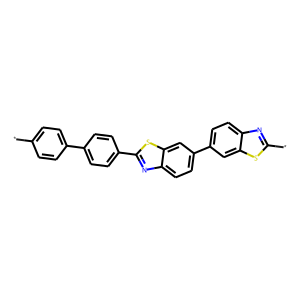

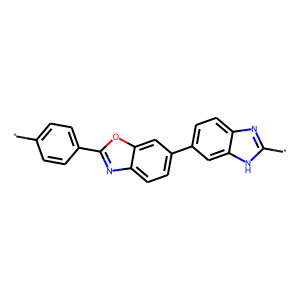

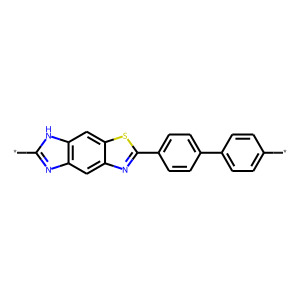

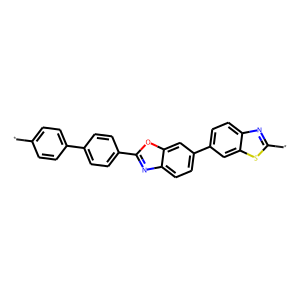

In [21]:
# Importing drawing-related modules
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG
import rdkit
import IPython.display



smis_list = Tg_over_450['Smiles'].values.tolist()

for smi in smis_list:
    mol = Chem.MolFromSmiles(smi)
    d = rdMolDraw2D.MolDraw2DSVG(300, 300)
    d.DrawMolecule(mol)
    d.FinishDrawing()
    p = d.GetDrawingText()
    i = IPython.display.SVG(p)
    display(i)


    

In [20]:
# Filter out the data with SA less than 3
SA_lower_than_3 = erji[erji['SA']<3]
SA_lower_than_3

,index,Smiles,SA,Tg_pred,Morgan fingerprint pairs
52,8685,*c1ccc(-c2ccc(S(=O)(=O)c3ccc(-c4ccc(-c5nnc(*)s...,2.972666,406.252197,"[366, 587, 1896]"
79,9011,*Nc1ccc(-c2ccc(NC(=O)c3ccc(C(*)=O)cc3)cc2)c(C(...,2.744554,399.055267,"[264, 575, 618, 1831]"
121,2644,*c1ccc(-c2ccc(-c3nc4cc(-c5ccc6nc(*)c(-c7ccccc7...,2.916378,391.124085,"[587, 1073, 1896]"
133,3415,*Nc1ccc(NC(=O)c2cc(C(=O)O)cc(C(=O)Nc3ccc(*)cc3...,2.990587,389.533051,"[587, 618, 1831, 1896]"
279,5989,*c1[nH]c(*)c(-c2ccccc2)c1-c1ccccc1,2.953586,371.641388,"[587, 1753]"
...,...,...,...,...,...
625975,8868,*CCOCCOCCOCCCCOCCCCOCCCCCCOCCCCOCCO*,2.945912,-85.296120,"[247, 386, 1072, 1688]"
626026,5015,*CCCCCOCCCCOCCCCCCCCOCCCCCO*,2.900498,-85.895920,"[247, 386, 1072, 1688]"
626144,1709,*CCCCOCCCCOCCCCCOCCCCOCCOCCOCCO*,2.995065,-87.353706,"[247, 386, 1072, 1688]"
626263,9260,*Nc1ccccc1NC(=O)Nc1ccc(Cc2ccc(NC(=O)OC(C)(C)C(...,2.956391,-88.801239,"[101, 264, 618, 1831]"


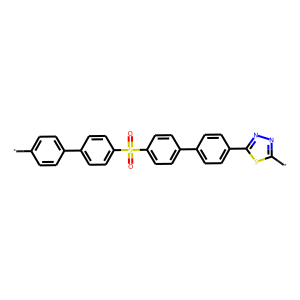

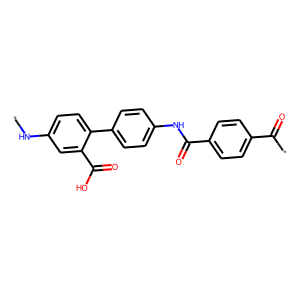

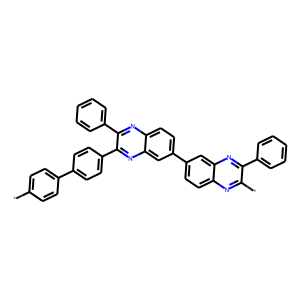

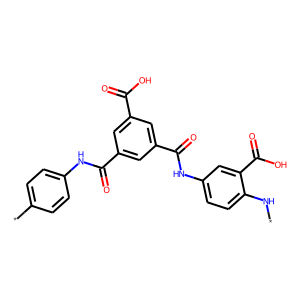

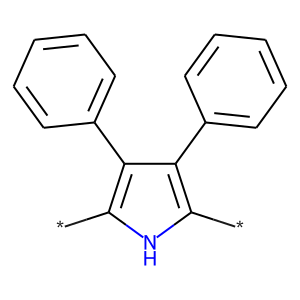

In [22]:
smi_list = SA_lower_than_3['Smiles'].values.tolist()

for num in range(5):
    mol = Chem.MolFromSmiles(smi_list[num])
    d = rdMolDraw2D.MolDraw2DSVG(300, 300)
    d.DrawMolecule(mol)
    d.FinishDrawing()
    p = d.GetDrawingText()
    i = IPython.display.SVG(p)
    display(i)

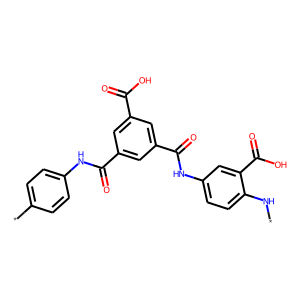

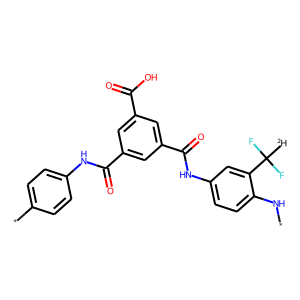

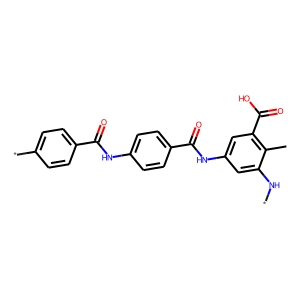

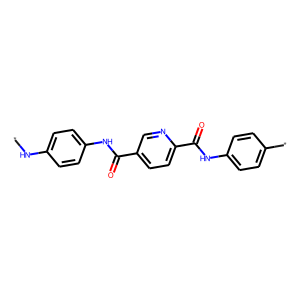

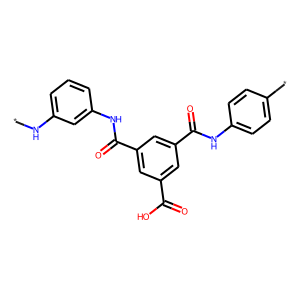

In [30]:
# Contains the specified Morgan fingerprint pairs
test_pairs = [587, 618, 1831, 1896]

df = erji.values[:]

index_list_PI1M = []
smile_list = []
SA_list = []
Tg_list_pred = []
pairs_list = []


for i in range(len(df)):
    temp0,temp1,temp2,temp3,temp4 = df[i]
    index_list_PI1M.append(int(temp0))
    smile_list.append(temp1)
    SA_list.append(temp2)
    Tg_list_pred.append(temp3)
    pairs_list.append(temp4)

smile_select =[]
Tg_select = []
SA_select = []
pairs_select = []
for num in tqdm(range(len(pairs_list))):
    if str(test_pairs) == pairs_list[num]:
        smile_select.append(smile_list[num])
        Tg_select.append(Tg_list_pred[num])
        SA_select.append(SA_list[num])
        pairs_select.append(pairs_list[num])   
    else:
        pass
    
for num in range(5):
    mol = Chem.MolFromSmiles(smile_select[num])
    d = rdMolDraw2D.MolDraw2DSVG(300, 300)
    d.DrawMolecule(mol)
    d.FinishDrawing()
    p = d.GetDrawingText()
    i = IPython.display.SVG(p)
    display(i)

        
        

100%|████████████████████████████████████████████████████████████████████████| 627452/627452 [02:23<00:00, 4359.71it/s]


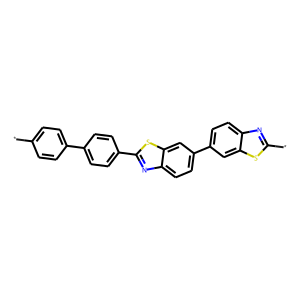

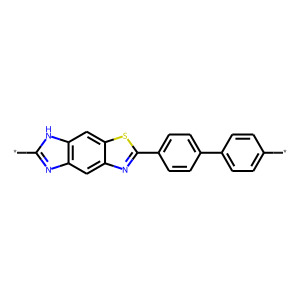

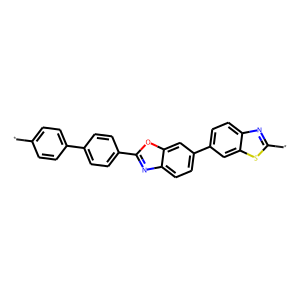

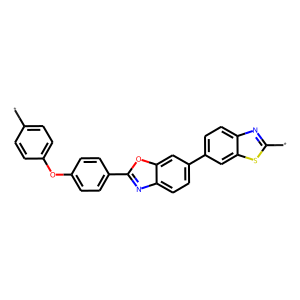

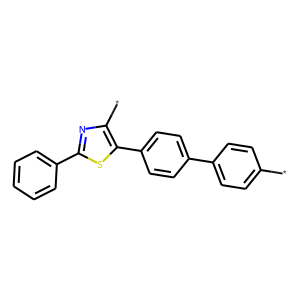

In [43]:
# Contains the specified elements
from tqdm import tqdm
element = 'S'

smile_select =[]
Tg_select = []
SA_select = []
pairs_select = []
for num in tqdm(range(len(pairs_list))):
    mol = Chem.MolFromSmiles(smile_list[num])
    Atoms_Symbol = [ x.GetSymbol() for x in mol.GetAtoms()]
    if element in Atoms_Symbol:
        smile_select.append(smile_list[num])
        Tg_select.append(Tg_list_pred[num])
        SA_select.append(SA_list[num])
        pairs_select.append(pairs_list[num])   
    else:
        pass

for num in range(5):
    mol = Chem.MolFromSmiles(smile_select[num])
    d = rdMolDraw2D.MolDraw2DSVG(300, 300)
    d.DrawMolecule(mol)
    d.FinishDrawing()
    p = d.GetDrawingText()
    i = IPython.display.SVG(p)
    display(i)

        
